<a href="https://colab.research.google.com/github/FernandoZR83/ANN_DL_ML/blob/master/Replica_de_CNN_con_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo Regresion con tensorflow

In [1]:
!git clone 'https://github.com/FernandoZR83/ANN_DL_ML/'

fatal: destination path 'ANN_DL_ML' already exists and is not an empty directory.


In [0]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import sklearn 
import sys

In [0]:
sys.path.append('ANN_DL_ML')
import planar_utils

In [0]:
from planar_utils import plot_decision_boundary, sigmoid

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent over iterations

In [0]:
def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles

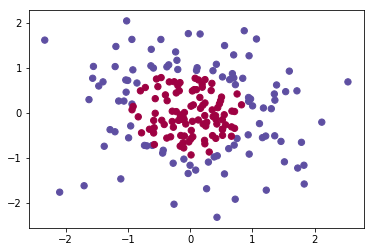

In [5]:
gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);

In [6]:
#Simple logistic regression
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy of logistic regression: 55 % (percentage of correctly labelled datapoints)
[[0.19035194 0.1785737 ]]


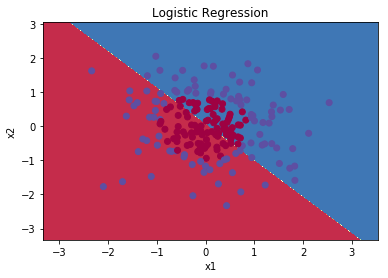

In [7]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0,:])
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")
print(clf.coef_)

In [8]:
print(clf.coef_)
print(clf.intercept_)

[[0.19035194 0.1785737 ]]
[-0.01595924]


In [9]:
gaussian_quantiles= load_extra_datasets()
X, Y=gaussian_quantiles
#train_data,output=X.T,Y.reshape(1, Y.shape[0])
train_data, output = X,Y
print(train_data.shape)
print(output.shape)


(200, 2)
(200,)


In [10]:
input_size = 2
output_size = 1
hiden_layer_size = 4

#tf.keras.sequential is a function used to "stack layers"
#Our model's name is model
model = tf.keras.Sequential([
    #we need to flat images to get them a vector
    #First line in sequential function is used to delcare our input layer
    #tf.keras.layers.Flatten(input_shape = (2,200,1)),
    #tf.keras.layers.Dense(output_size) takes the inputs, provided to the model and calculates the dot product of the
    #inputs and the weights and adds the bias.
    #This is also where we can apply an activation function
    tf.keras.layers.Dense(hiden_layer_size, activation='tanh'),
    #We create the second hidden layer the same way
    #tf.keras.layers.Dense(hiden_layer_size, activation='tanh'),
    #Output layer
    tf.keras.layers.Dense(output_size, activation = 'sigmoid')

])


W0729 20:50:42.612662 140641402718080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics = ['accuracy'])
#model.summary()

In [16]:
#Choose number of epochs
NUM_EPOCHS = 200

model.fit(train_data, output, epochs = NUM_EPOCHS, verbose=1)
#print(train_data.shape)

Epoch 1/200
200/200 [==============================] - 0s 380us/sample - loss: 0.6017 - acc: 0.6800
Epoch 2/200
200/200 [==============================] - 0s 101us/sample - loss: 0.6011 - acc: 0.6800
Epoch 3/200
200/200 [==============================] - 0s 96us/sample - loss: 0.6005 - acc: 0.6900
Epoch 4/200
200/200 [==============================] - 0s 110us/sample - loss: 0.5999 - acc: 0.6900
Epoch 5/200
200/200 [==============================] - 0s 94us/sample - loss: 0.5993 - acc: 0.6900
Epoch 6/200
200/200 [==============================] - 0s 111us/sample - loss: 0.5987 - acc: 0.6900
Epoch 7/200
200/200 [==============================] - 0s 111us/sample - loss: 0.5982 - acc: 0.6950
Epoch 8/200
200/200 [==============================] - 0s 97us/sample - loss: 0.5976 - acc: 0.7000
Epoch 9/200
200/200 [==============================] - 0s 106us/sample - loss: 0.5970 - acc: 0.7000
Epoch 10/200
200/200 [==============================] - 0s 100us/sample - loss: 0.5965 - acc: 0.6950
Ep